In [ ]:
!pip install gensim==3.8.1 matplotlib==3.1.0 nltk==3.4.4 numpy==1.16.4 pandas==0.24.2 pomegranate==0.12.0 scikit-image==0.15.0 scikit-learn==0.21.2 scipy==1.3.0 seaborn==0.9.0 torch==1.3.1 torchvision==0.4.2 tqdm==4.32.1 joblib==0.17.0
!pip install numba==0.48.0 --ignore-installed
!pip install librosa==0.7.1

  Using cached numpy-1.16.4-cp37-cp37m-manylinux1_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires numpy>=1.17, but you have numpy 1.16.4 which is incompatible.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.24.2 which is incompatible.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.3.1 which is incompatible.
spacy 2.2.4 requires tqdm<5.0.0,>=4.38.0, but you have tqdm 4.32.1 which is incompatible.
pyerfa 2.0.0.1 requires numpy>=1.17, but you have numpy 1.16.4 which is incompatible.
pyarrow 3.0.0 requires numpy>=1.16.6, but you have numpy 1.16.4 which is incompatible.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.1.0 which i

  Using cached numba-0.48.0-1-cp37-cp37m-manylinux2014_x86_64.whl (3.5 MB)
     |████████████████████████████████| 952 kB 13.8 MB/s 
  Using cached llvmlite-0.31.0-cp37-cp37m-manylinux1_x86_64.whl (20.2 MB)
  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.24.2 which is incompatible.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.3.1 which is incompatible.
spacy 2.2.4 requires tqdm<5.0.0,>=4.38.0, but you have tqdm 4.32.1 which is incompatible.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.1.0 which is incompatible.
plotnine 0.6.0 requires pandas>=0.25.0, but you have pandas 

In [ ]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn import preprocessing
import librosa.display
import seaborn as sns

In [ ]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
class CustomNBClassifier(BaseEstimator, ClassifierMixin):
    """Custom implementation Naive Bayes classifier"""
    
    def __init__(self, use_unit_variance=False):
        self.use_unit_variance = use_unit_variance
        self.classes=None
        self.X_mean=None
        self.X_var=None
        self.a_priori = None
        


    def fit(self, X, Y):
        ## X: (n_training examples)x(n_features)
        ## y is an 1d vector: 1x(number of training examples)
        
       # Check that X and y have correct shape
        (X,Y) = check_X_y(X, Y)
        
        # Store the classes seen during fit
        self.classes = unique_labels(Y)
        
   
        
        # Number of features
        (_, n_features) = X_train.shape
        # Initialization
        self.X_mean = np.zeros(( (len(self.classes)), n_features ))
        self.X_var=np.zeros(( (len(self.classes)), n_features ))
        # Compute X_mean_ and X_var
        for label in self.classes:
            
            label = int(label)
            labelX = X[Y == label]
            labelM = np.mean(labelX, axis=0)
            labelV=np.var(labelX,axis=0)
            self.X_mean[label-1] = np.add(self.X_mean[label-1], labelM) 
            self.X_var[label-1]=np.add(self.X_var[label-1],labelV)
        
        
        
        
       #Compute a_priori possibilities
        labels=[]
        num_in_labels=[]
        labels, num_in_labels = np.unique(Y, return_counts=True)
        self.a_priori=num_in_labels/sum(num_in_labels)
        return self
        
       


    def predict(self, X):
        #print("length",len(X))
        #X = check_array(X)
        
        # Initialize y_predict
        (n_tests, _) = X.shape 
        y_predict = np.zeros((n_tests, 1))
        
        #predict
        for test in range(len(X)):
            bayes_classify=[]
          
            
            for train1,train2,train3 in zip(range(len(self.X_mean)),range(len(self.X_var)),range(len(self.a_priori))):
            #for train1,train2 in zip(self.X_mean,self.X_var):
                divide=np.true_divide(((X[test]-self.X_mean[train1])**2),(2*self.X_var[train2] + 10**(-5)))
                exp=np.exp(-divide)
                pithanofaneia=np.true_divide(1,np.sqrt(2*np.pi*self.X_var[train2])+ 10**(-5))* exp
                #print("product",np.prod(pithanofaneia))
                bayes=self.a_priori[train3]*np.prod(pithanofaneia)
                
                bayes_classify.append(bayes)
            
              
            y_predict[test]=np.argmax(bayes_classify)+1
        
        
        
        return y_predict

    def score(self, X, y_truth):
        y_predict = self.predict(X)
        score=np.sum(np.where(y_predict.T == y_truth,1,0))
        return score/len(y_predict)


def dataparser(path):
    digits=['one','two','three' , 'four','five','six','seven','eight','nine']
    wav=[]
    speaker_list=[]
    digit_list=[]
    for i in digits:
        for speaker in range(1,16):
            if (i + str(speaker)!='six12') and (i + str(speaker)!='eight7'):
                wav_file,_=librosa.load(path + i + str(speaker) + '.wav',sr=16000)
                wav.append(wav_file)
                speaker_list.append(speaker)
                digit_list.append(i)
    return wav,speaker_list,digit_list

In [ ]:
wav,speaker,digit=dataparser('/' )
digit=np.asarray(digit)

In [ ]:
print('the lengths of the lists:')
print('wav_list length:',len(wav))
print('speaker_list length:',len(speaker))
print('digit_list length:',len(digit))
print('lets take a closer look at the lists')
print('the first wav file of the wav_list:',wav[0])
print ('the first ten speakers:',speaker[:10])
print ('the fisrt ten digits:',digit[:10])

the lengths of the lists:
wav_list length: 133
speaker_list length: 133
digit_list length: 133
lets take a closer look at the lists
the first wav file of the wav_list: [0.00228882 0.00271606 0.0032959  ... 0.00253296 0.00274658 0.00265503]
the first ten speakers: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
the fisrt ten digits: ['one' 'one' 'one' 'one' 'one' 'one' 'one' 'one' 'one' 'one']


In [ ]:
sr=16000
window_width=0.025
hop=0.01
features_mfcc=[]
mfcc_deltas=[]
mfcc_delta_deltas=[]
mfsc_features=[]
for i in range(133):
    mfcc=librosa.feature.mfcc(y=wav[i], sr=sr, n_mfcc=13, hop_length=int(sr*hop), win_length=int(sr*window_width))
    features_mfcc.append(mfcc)
    mfsc =librosa.feature.melspectrogram(y=wav[i], sr=sr, hop_length=int(sr*hop), win_length=int(sr*window_width))[0:13]
    mfsc_features.append(mfsc)
    deltas=librosa.feature.delta(mfcc,order=1)
    mfcc_deltas.append(deltas)
    delta_deltas=librosa.feature.delta(mfcc,order=2)
    mfcc_delta_deltas.append(delta_deltas)

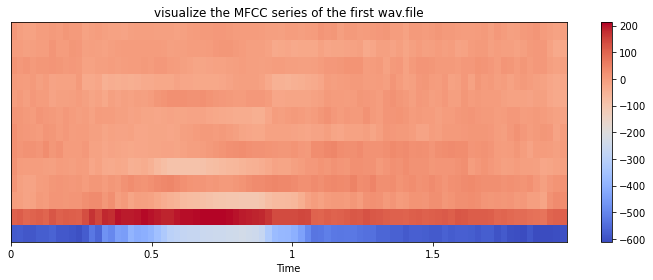

In [ ]:
"""visualize mfcc"""
plt.figure(figsize=(10, 4))
librosa.display.specshow(features_mfcc[0], x_axis='time')
plt.colorbar()
plt.title('visualize the MFCC series of the first wav.file')
plt.tight_layout()

In [ ]:
a0=[]
a1=[]
n1_feature0=[]
n1_feature1=[]
mfcc_9=[]
mfsc_9=[]
for i in range(133):
    if digit[i]=='nine' :
       mfcc_9.append((features_mfcc[i],speaker[i]))
       mfsc_9.append((mfsc_features[i],speaker[i]))
       n1_feature0.append(features_mfcc[i][0])
       a0=np.hstack((a0,features_mfcc[i][0]))
       n1_feature1.append(features_mfcc[i][1])
       a1=np.hstack((a1,features_mfcc[i][1]))

In [ ]:
b0=[]
b1=[]     
n2_feature0=[]
n2_feature1=[]
mfcc_7=[]
mfsc_7=[]
for i in range(133):
    if digit[i]=='seven' :
       mfcc_7.append((features_mfcc[i],speaker[i]))
       mfsc_7.append((mfsc_features[i],speaker[i]))
       n2_feature0.append(features_mfcc[i][0])
       b0=np.hstack((b0,features_mfcc[i][0]))
       n2_feature1.append(features_mfcc[i][1])
       b1=np.hstack((b1,features_mfcc[i][1]))

In [ ]:
def hist(data, coef,hist):
    if hist=="with speakers":
        fig,axe=plt.subplots()
        for i in range(len(data)):
            axe.hist(data[i],bins=8,density=False,histtype='step',alpha=0.5,label=('speaker' + str(i)))
        axe.legend(bbox_to_anchor=(1, 1),bbox_transform=fig.transFigure)
        axe.set_title(coef[0]+' mfcc_feature of the number ' + coef[1] +' for all the speakers')
        plt.show()
    if hist=="only values":
        fig,axe=plt.subplots()
        axe.hist(data,bins=8,density=False,histtype='stepfilled',alpha=0.5)
        axe.set_title(coef[0]+' mfcc_feature of the number ' + coef[1] +' of the array which contains every 1st Mfcc for each speaker')
        plt.show()

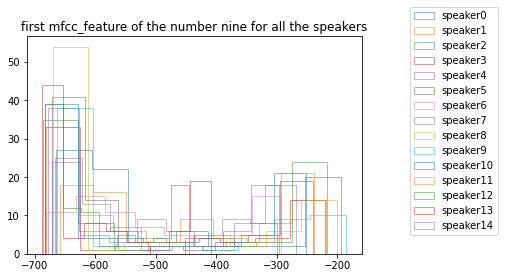

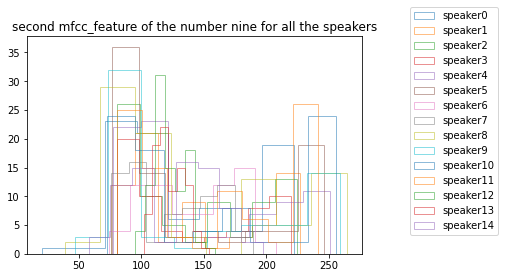

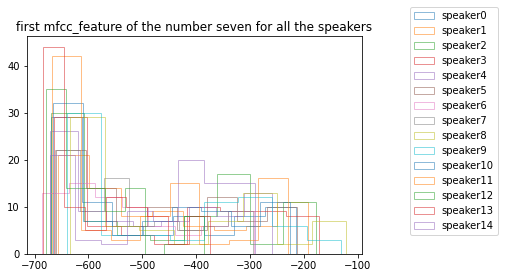

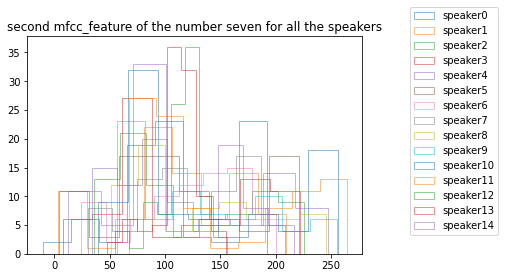

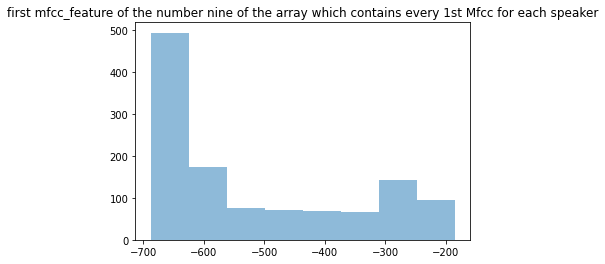

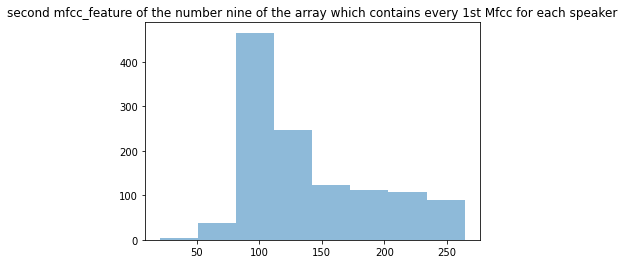

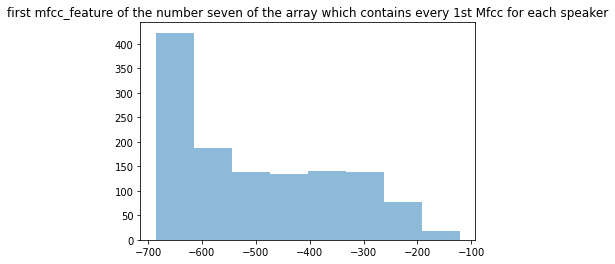

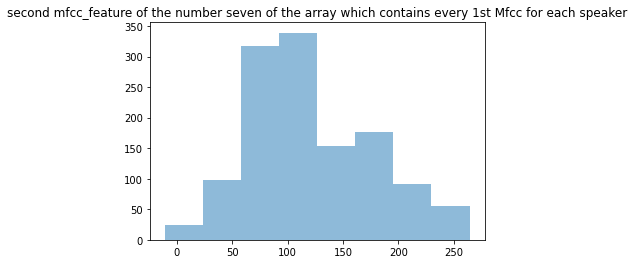

In [ ]:
hist(n1_feature0,coef=['first','nine'] , hist="with speakers")
hist(n1_feature1,coef=['second','nine'],hist="with speakers")
hist(n2_feature0,coef=['first','seven'],hist="with speakers")
hist(n2_feature1,coef=['second','seven'],hist="with speakers")
hist(a0,coef=['first','nine'],hist="only values")
hist(a1,coef=['second','nine'],hist="only values")
hist(b0,coef=['first','seven'],hist="only values")
hist(b1,coef=['second','seven'],hist="only values")

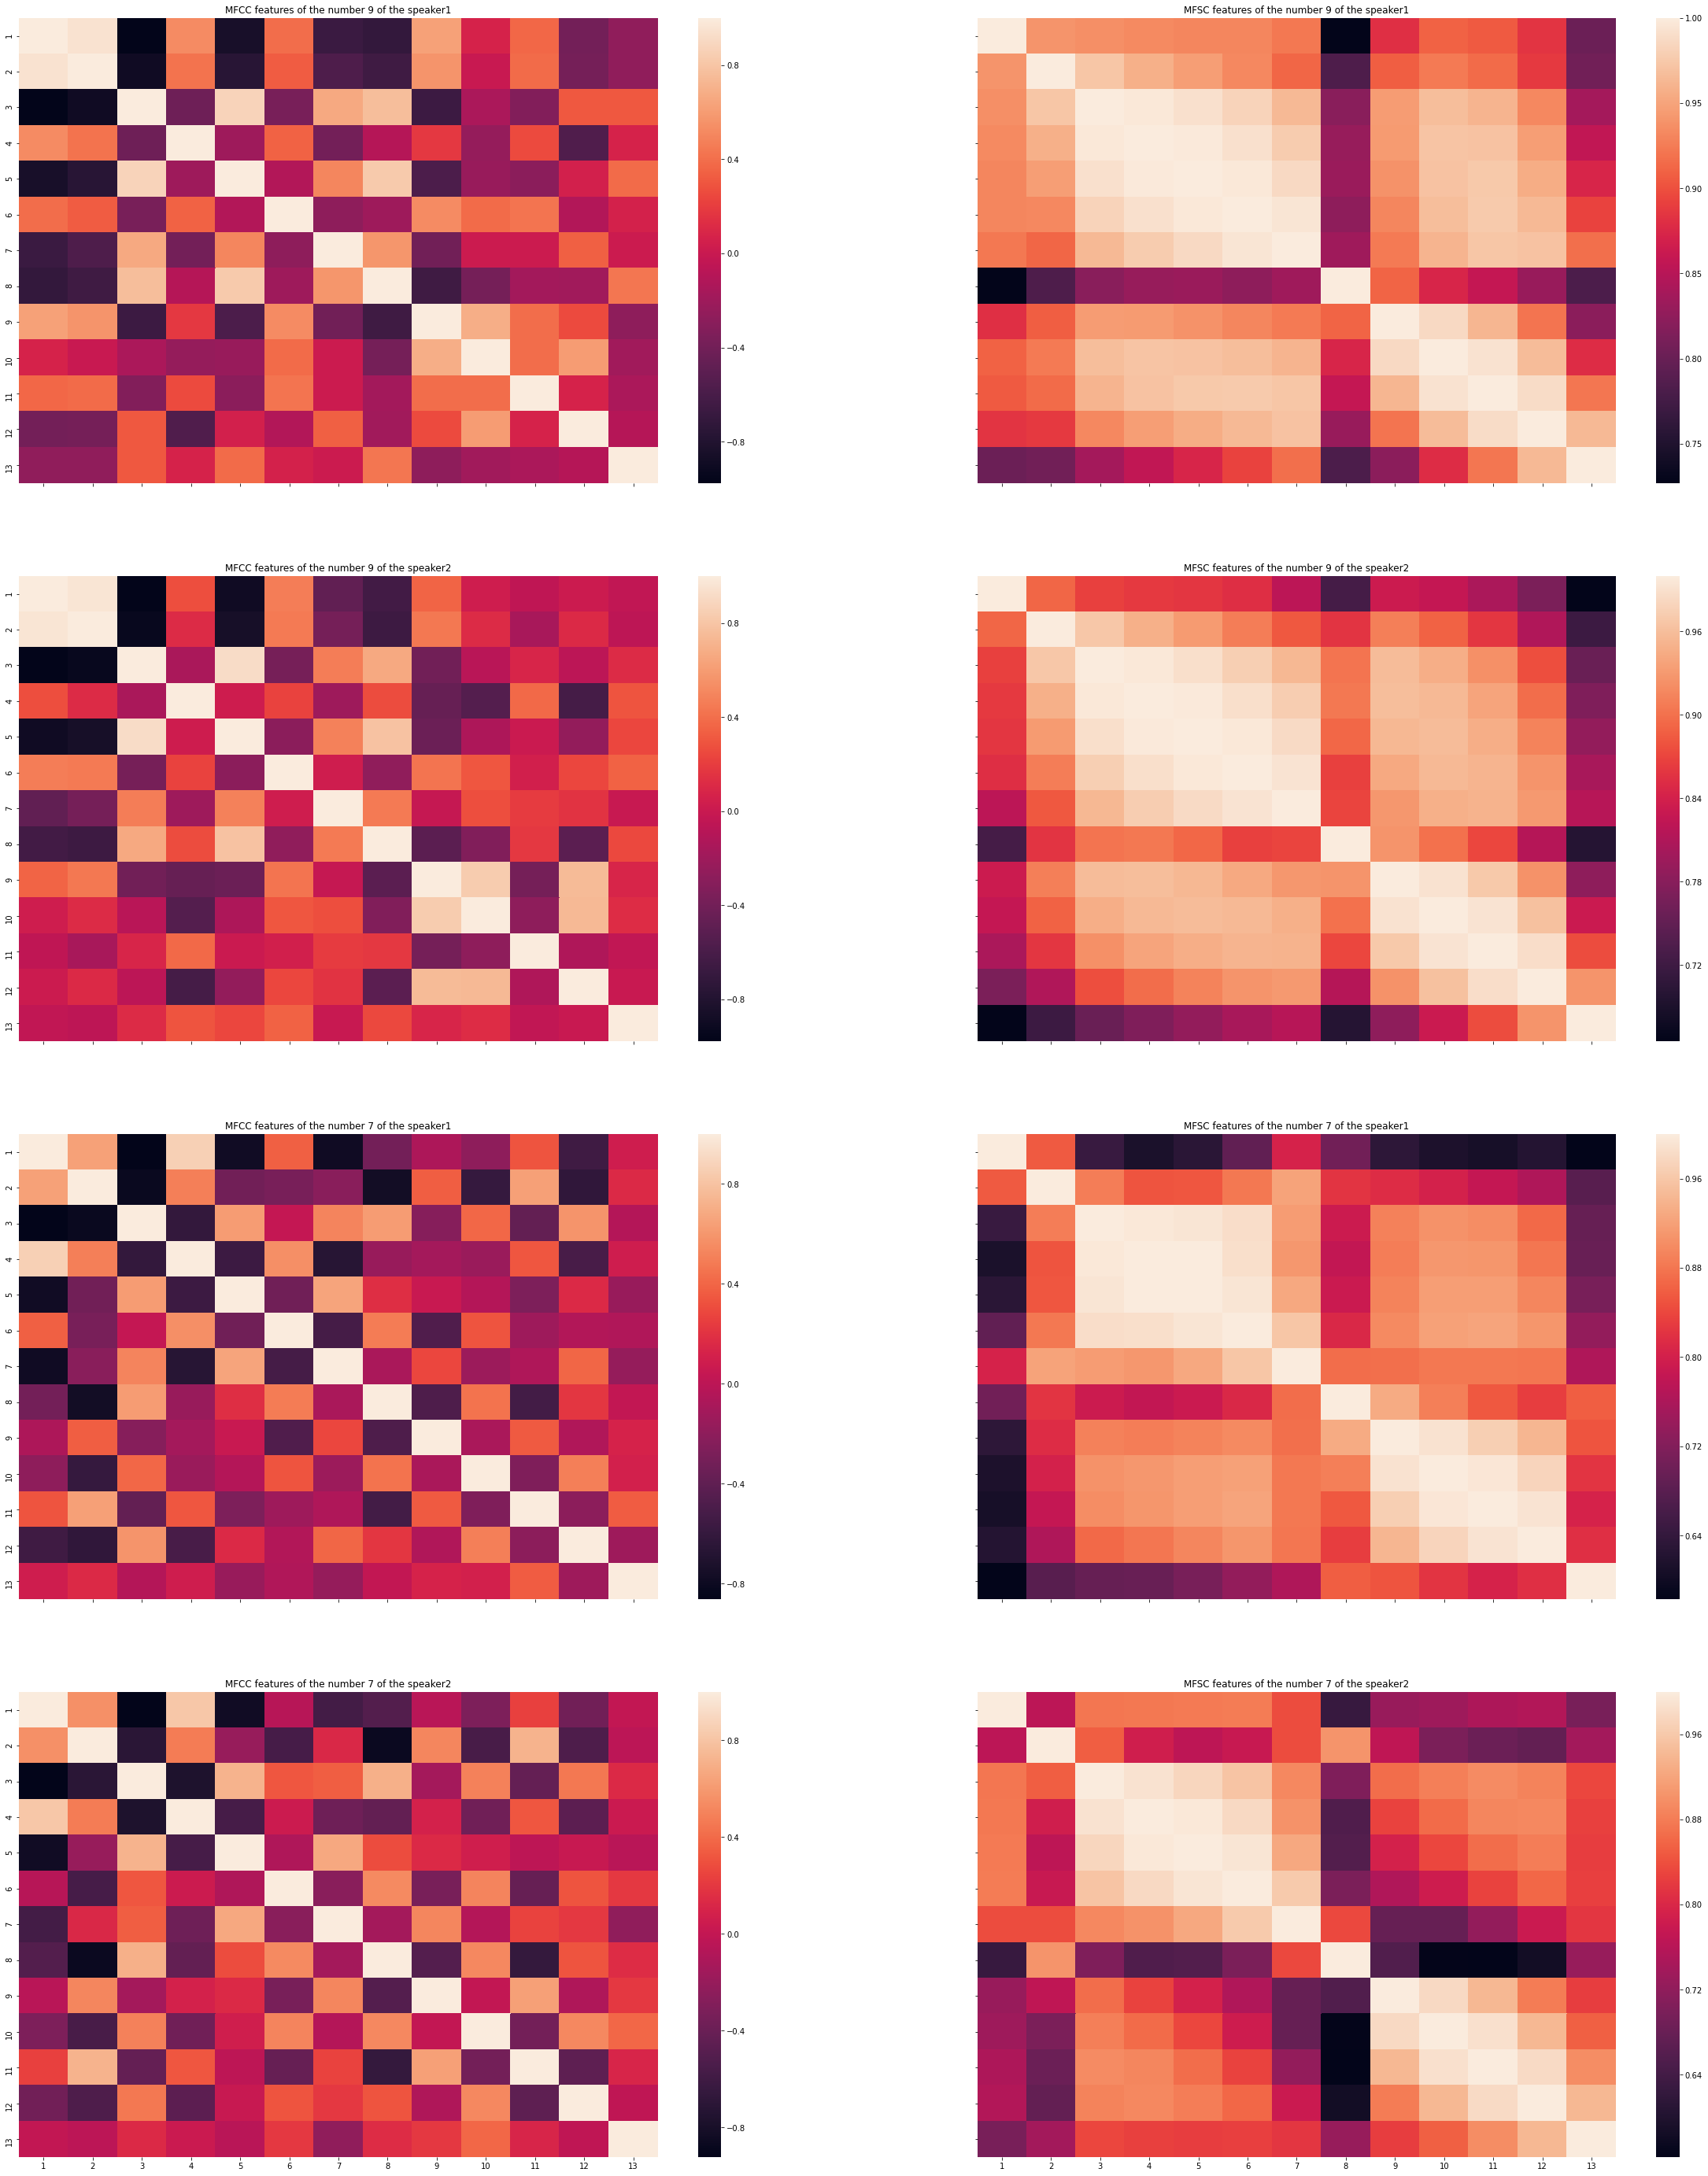

In [ ]:
#compare MFSCs and MFCCs
%matplotlib inline
del list
fig, ax = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(40,50))
ax = ax.flatten()

for i in range(2):

  #MFCC
  input= mfcc_9[i][0].reshape((13,-1))
  corr= np.corrcoef(input)
  sns.heatmap(corr, xticklabels=list(range(1,corr.shape[0]+1)), yticklabels=list(range(1,corr.shape[0]+1)), ax=ax[2*i])
  ax[2*i].set_title('MFCC features of the number 9 of the speaker'+str(mfcc_9[i][1]))

  input= mfcc_7[i][0].reshape((13,-1))
  corr= np.corrcoef(input)
  sns.heatmap(corr, xticklabels=list(range(1,corr.shape[0]+1)), yticklabels=list(range(1,corr.shape[0]+1)), ax=ax[2*(i+2)])
  ax[2*(i+2)].set_title('MFCC features of the number 7 of the speaker'+str(mfcc_7[i][1]))

  #MFSC
  input= mfsc_9[i][0].reshape((13,-1))
  corr= np.corrcoef(input)
  sns.heatmap(corr, xticklabels=list(range(1,corr.shape[0]+1)), yticklabels=list(range(1,corr.shape[0]+1)), ax=ax[2*i+1])
  ax[2*i +1].set_title('MFSC features of the number 9 of the speaker'+str(mfcc_9[i][1]))

  input= mfsc_7[i][0].reshape((13,-1))
  corr= np.corrcoef(input)
  sns.heatmap(corr, xticklabels=list(range(1,corr.shape[0]+1)), yticklabels=list(range(1,corr.shape[0]+1)), ax=ax[2*(i+2) +1])
  ax[2*(i +2) + 1].set_title('MFSC features of the number 7 of the speaker'+str(mfcc_7[i][1]))



  

In [ ]:
feature_array=[]
for i in range(133):
    concatenate_array=np.concatenate((features_mfcc[i],mfcc_deltas[i],mfcc_delta_deltas[i]),axis=1)
    mean_feature=np.mean(concatenate_array,axis=1)
    var_feature=np.std(concatenate_array,axis=1)
    feature_array.append(np.concatenate((mean_feature,var_feature),axis=0))
feature_array=np.asarray(feature_array)

In [ ]:
print('lets take a look inside the feature array')
print('the length of the feature array is:',len(feature_array))
print('the shape of the feature_array that describes the first wav file is:',feature_array[0].shape)
print("the features that describe the first wac file are the following\n",feature_array[0])

lets take a look inside the feature array
the length of the feature array is: 133
the shape of the feature_array that describes the first wav file is: (26,)
the features that describe the first wac file are the following
 [-1.6162904e+02  4.6411625e+01 -4.2558022e+00  7.3691907e+00
 -4.8146443e+00  3.4674647e+00 -1.5104554e+00 -1.2147608e+00
 -4.4469640e-01 -4.5221763e+00  5.2166486e-01 -2.0092385e+00
 -4.7572985e-02  2.4000714e+02  6.9868599e+01  2.5001829e+01
  1.2966921e+01  2.0731041e+01  1.1362175e+01  6.9690285e+00
  8.2081079e+00  7.2592425e+00  1.1117569e+01  5.5376658e+00
  6.4181018e+00  4.0425367e+00]


In [ ]:
def scatter_plot(X0,X1,feature0,feature1):
    fig, ax = plt.subplots()
    n_classes = 9
    filled_markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h']
    colors = ['red', 'yellow', 'blue', 'green', 'black', 'purple', 'orange', 'silver', 'grey']
    for i,j in zip(np.unique(digit),range(9)):
            
            ax.scatter(X0[digit==i], X1[digit==i],
            c=(colors[j]),marker=filled_markers[j],label=i,
            s=80, alpha=0.8, edgecolors='k')

    
    ax.set_ylabel(feature1)
    ax.set_xlabel(feature0)
    ax.set_title("scatter plot")
    ax.legend()
    plt.show()

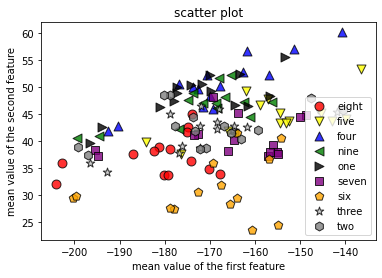

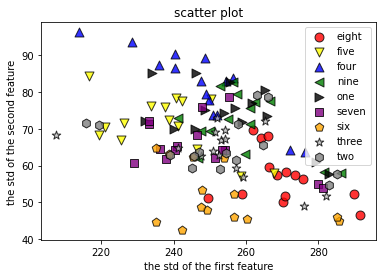

In [ ]:
scatter_plot(feature_array[:,0],feature_array[:,1],feature0='mean value of the first feature',feature1='mean value of the second feature')
scatter_plot(feature_array[:,13],feature_array[:,14],feature0='the std of the first feature',feature1='the std of the second feature')

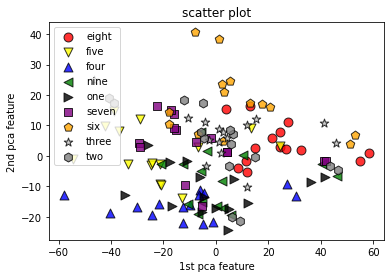

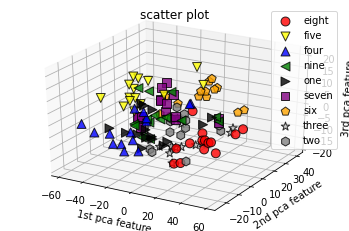

In [ ]:
pca1=PCA(n_components=2)
Xall1=pca1.fit_transform(feature_array)
scatter_plot(Xall1[:,0],Xall1[:,1],feature0='1st pca feature',feature1='2nd pca feature')

"""3-D scatter plot"""
pca= PCA(n_components=3)
Xall=pca.fit_transform(feature_array)
X0=Xall[:,0]
X1=Xall[:,1]
X2=Xall[:,2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
n_classes = 9
filled_markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h']
colors = ['red', 'yellow', 'blue', 'green', 'black', 'purple', 'orange', 'silver', 'grey']
for i,j in zip(np.unique(digit),range(9)):
        ax.scatter(
            X0[digit==i],X1[digit==i],X2[digit==i],
            c=(colors[j]),marker=filled_markers[j],label=i,
            s=80, alpha=0.8, edgecolors='k'
        )

    
ax.set_ylabel("2nd pca feature")
ax.set_xlabel("1st pca feature")
ax.set_zlabel("3rd pca feature")
ax.set_title("scatter plot")
ax.legend()
plt.show()

In [ ]:
#to pososto ths arxikhs diasporas poy diathroyn ta pca components
"""for n_components=2"""
print("To ποσοστό της αρχικής διασποράς που διατηρούν τα n=2 pca components",pca1.explained_variance_ratio_)

"""for n_components=3"""
print("To ποσοστό της αρχικής διασποράς που διατηρούν τα n=3 pca components",pca.explained_variance_ratio_)

To ποσοστό της αρχικής διασποράς που διατηρούν τα n=2 pca components [0.6066023  0.18282329]
To ποσοστό της αρχικής διασποράς που διατηρούν τα n=3 pca components [0.6066023  0.18282329 0.06786005]


In [ ]:
"""μετατρέπω τις κλάσεις από strings σε αριθμούς διατηρώντας την αντιστοιχια πχ 'one'=1 """
 
cdf= pd.DataFrame(digit)
list=[(1,'one'),(2,'two'),(3,'three'),(4,'four'),(5,'five'),(6,'six'),(7,'seven'),(8,'eight'),(9,'nine')]
class_mapping = {label:idx for idx,label in list}
cdf[0] = cdf[0].map(class_mapping)
Y=cdf[0].values
classes=np.unique(Y)
print(classes)
X_train, X_test, y_train, y_test = train_test_split(feature_array,Y,test_size=0.30, stratify=Y) 
y_test=y_test.reshape(40,1)
"πρώτα κάνουμε κανονικοποίηση των δεδομένων"
X_train_scaled = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_test_scaled = scaler.transform(X_test)

[1 2 3 4 5 6 7 8 9]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Confusion matrix, without normalization
[[3 0 0 1 0 0 0 0 1]
 [1 3 1 0 0 0 0 0 0]
 [0 1 2 0 0 0 0 1 0]
 [0 0 0 3 0 0 0 0 1]
 [0 0 0 0 4 0 1 0 0]
 [0 0 0 0 0 2 2 0 0]
 [1 2 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 0 2 0]
 [0 0 0 0 1 0 1 0 3]]


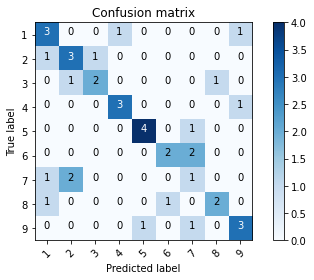

The performance of GaussianNB(priors=None, var_smoothing=1e-09) classifier is : 0.575
Confusion matrix, without normalization
[[2 0 0 1 1 0 0 0 1]
 [0 2 3 0 0 0 0 0 0]
 [0 3 1 0 0 0 0 0 0]
 [1 0 0 3 0 0 0 0 0]
 [0 1 0 0 2 0 2 0 0]
 [0 0 0 0 0 4 0 0 0]
 [1 1 0 0 0 0 2 0 0]
 [1 0 2 0 0 0 0 1 0]
 [0 1 0 0 1 0 1 0 2]]


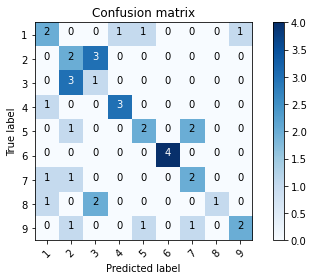

The performance of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') classifier is : 0.475
Confusion matrix, without normalization
[[2 0 0 1 0 0 0 0 2]
 [0 2 3 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 1 0]
 [0 0 0 3 0 0 0 0 1]
 [0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 3 1 0 0]
 [1 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 4 0]
 [0 0 0 1 0 0 0 0 4]]


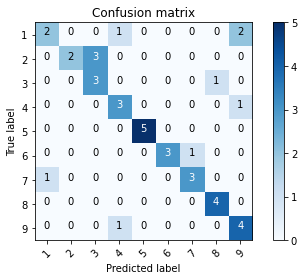

The performance of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) classifier is : 0.725
Confusion matrix, without normalization
[[4 0 0 1 0 0 0 0 0]
 [2 2 0 0 0 0 0 1 0]
 [0 1 2 0 0 0 0 1 0]
 [0 0 0 3 0 0 1 0 0]
 [0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 3 1 0 0]
 [0 0 0 0 0 1 2 0 1]
 [0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 5]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


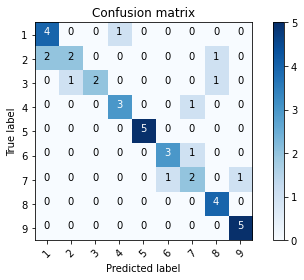

The performance of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) classifier is : 0.75
Confusion matrix, without normalization
[[3 0 0 1 0 0 0 0 1]
 [1 3 1 0 0 0 0 0 0]
 [0 1 2 0 0 0 0 1 0]
 [0 0 0 3 0 0 0 0 1]
 [0 0 0 0 4 0 1 0 0]
 [0 0 0 0 0 2 2 0 0]
 [1 2 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 0 2 0]
 [0 0 0 0 1 0 1 0 3]]


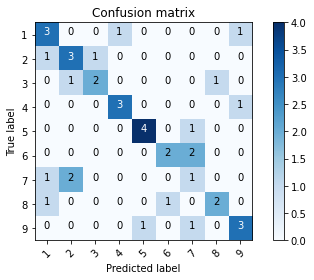

The performance of CustomNBClassifier() classifier is : 0.575


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
classifiers=[GaussianNB(),KNeighborsClassifier(),SVC(),LogisticRegression(),'CustomNBClassifier()']
for i in classifiers:
    if i=='CustomNBClassifier()':
        model=CustomNBClassifier()
        model.fit(X_train_scaled,y_train)
        preds=model.predict(X_test_scaled)
        cm=confusion_matrix(y_test,preds)
        plot_confusion_matrix(cm,classes) 
        plt.show()
        print('The performance of '+str(i)+' classifier is :'  , accuracy_score(y_test,preds))
        
    else:
        i.fit(X_train_scaled,y_train)
        preds=i.predict(X_test_scaled)
        preds=preds.reshape(40,1)
        cm=confusion_matrix(y_test,preds)
        plot_confusion_matrix(cm,classes)
        plt.show() 
        print('The performance of '+str(i)+' classifier is :'  , accuracy_score(y_test,preds))

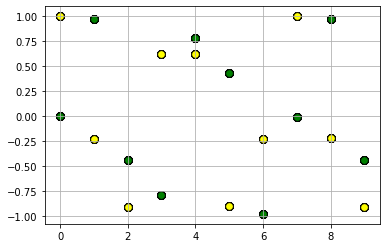

Epoch [5/100],  Loss: 0.2871


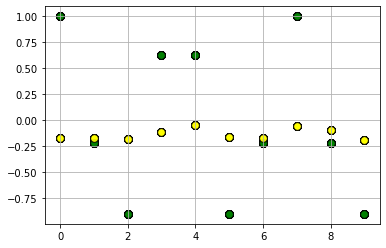

Epoch [10/100],  Loss: 0.2704


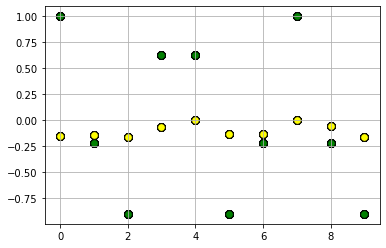

Epoch [15/100],  Loss: 0.2568


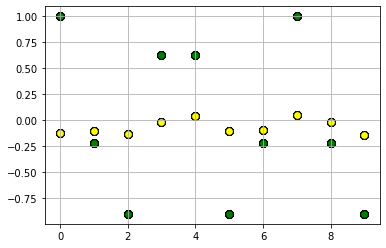

Epoch [20/100],  Loss: 0.2459


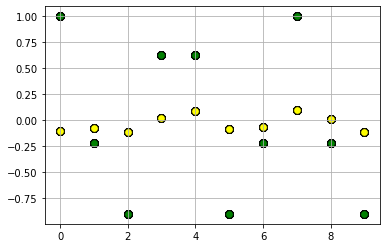

Epoch [25/100],  Loss: 0.2369


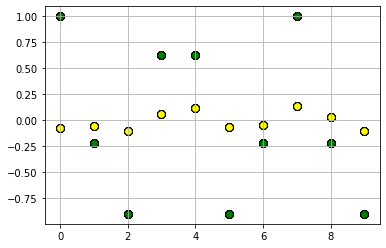

Epoch [30/100],  Loss: 0.2291


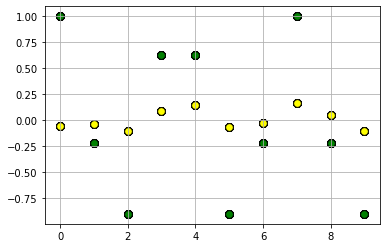

Epoch [35/100],  Loss: 0.2217


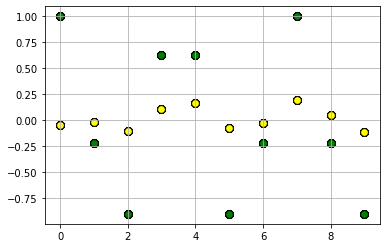

Epoch [40/100],  Loss: 0.2142


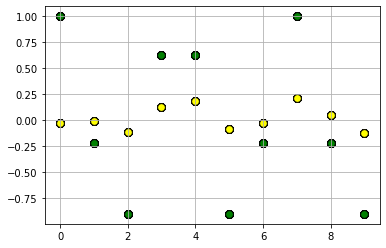

Epoch [45/100],  Loss: 0.2066


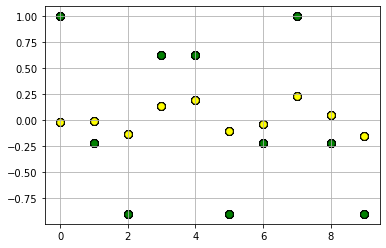

Epoch [50/100],  Loss: 0.1989


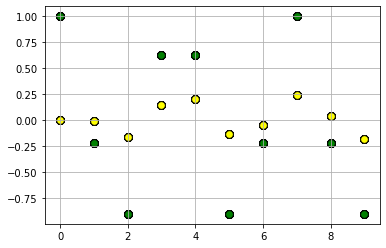

Epoch [55/100],  Loss: 0.1911


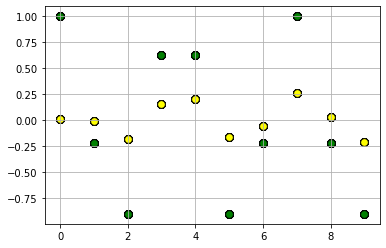

Epoch [60/100],  Loss: 0.1831


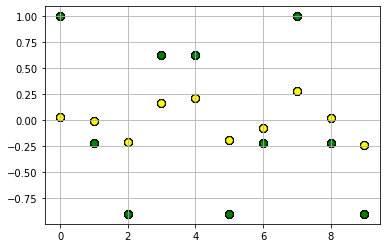

Epoch [65/100],  Loss: 0.1752


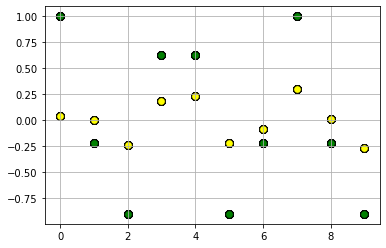

Epoch [70/100],  Loss: 0.1671


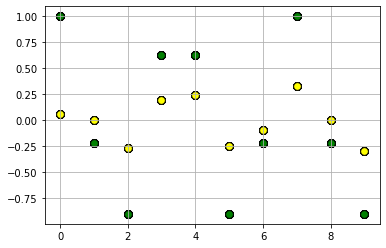

Epoch [75/100],  Loss: 0.1591


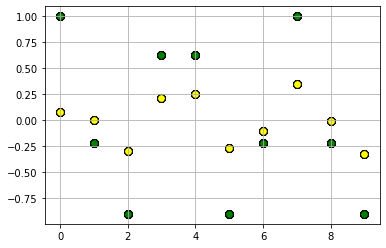

Epoch [80/100],  Loss: 0.1511


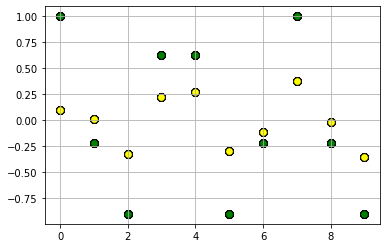

Epoch [85/100],  Loss: 0.1432


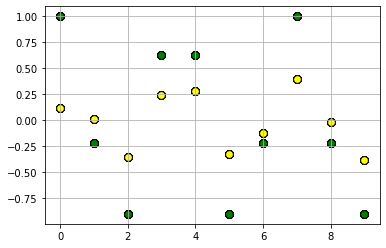

Epoch [90/100],  Loss: 0.1354


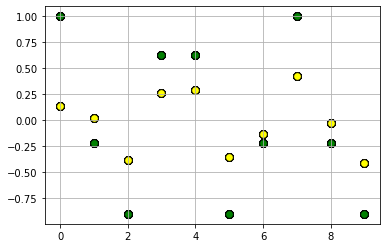

Epoch [95/100],  Loss: 0.1277


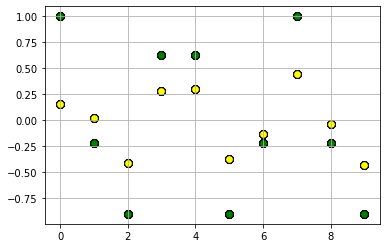

Epoch [100/100],  Loss: 0.1203


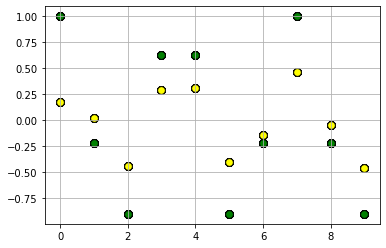

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Epoch [5/100], Loss: 0.2920


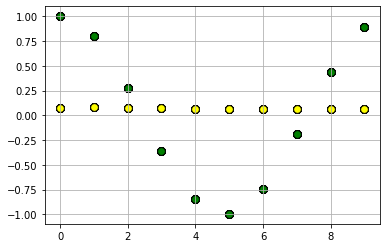

Epoch [10/100], Loss: 0.2867


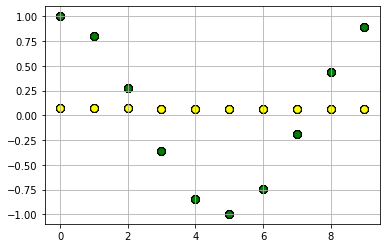

Epoch [15/100], Loss: 0.2820


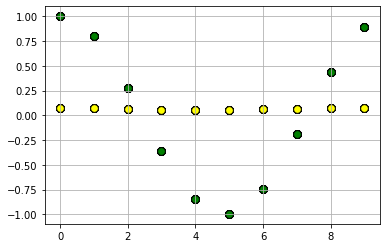

Epoch [20/100], Loss: 0.2777


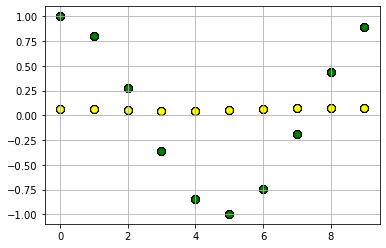

Epoch [25/100], Loss: 0.2738


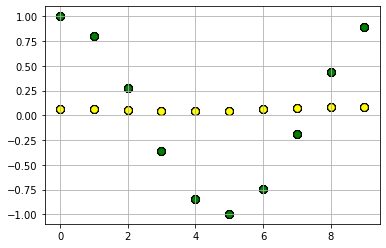

Epoch [30/100], Loss: 0.2703


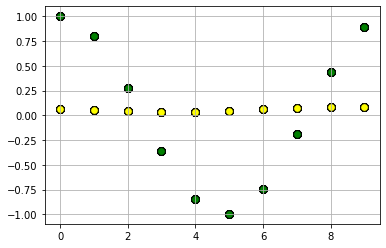

Epoch [35/100], Loss: 0.2671


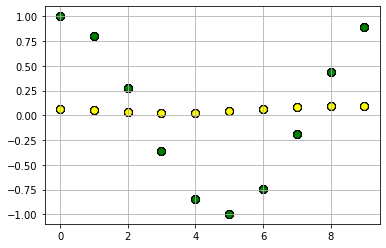

Epoch [40/100], Loss: 0.2641


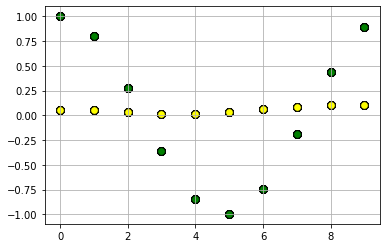

Epoch [45/100], Loss: 0.2614


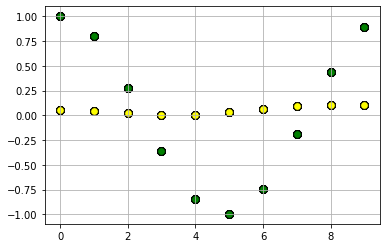

Epoch [50/100], Loss: 0.2588


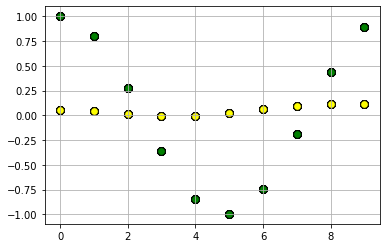

Epoch [55/100], Loss: 0.2564


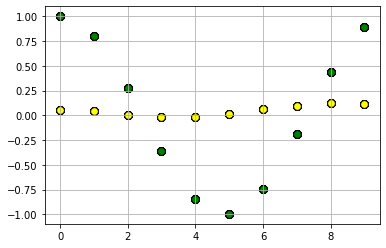

Epoch [60/100], Loss: 0.2541


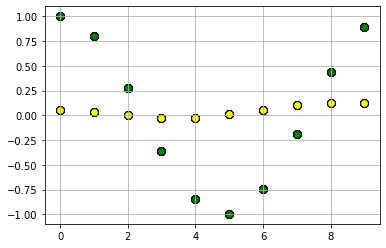

Epoch [65/100], Loss: 0.2518


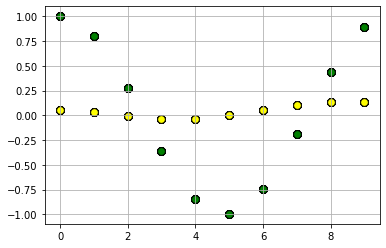

Epoch [70/100], Loss: 0.2495


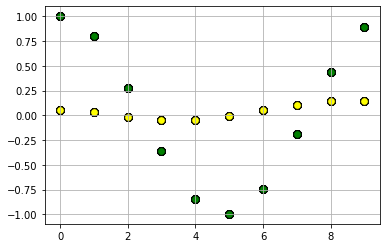

Epoch [75/100], Loss: 0.2471


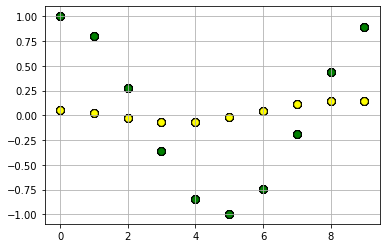

Epoch [80/100], Loss: 0.2446


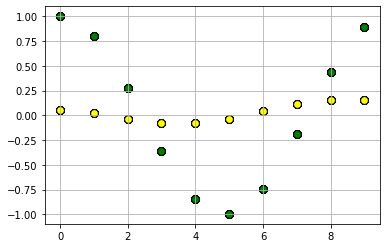

Epoch [85/100], Loss: 0.2420


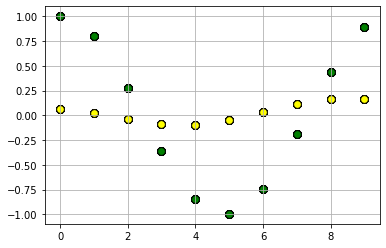

Epoch [90/100], Loss: 0.2391


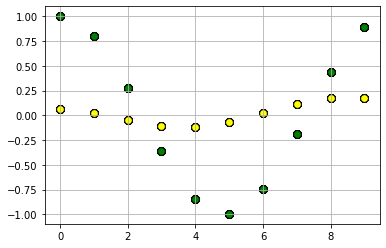

Epoch [95/100], Loss: 0.2359


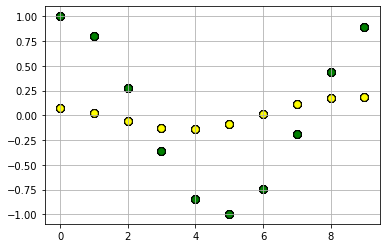

Epoch [100/100], Loss: 0.2324


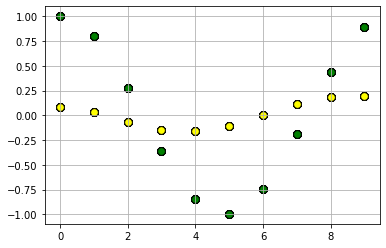

Epoch [5/100], Loss: 0.2659


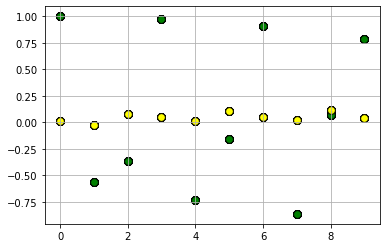

Epoch [10/100], Loss: 0.2594


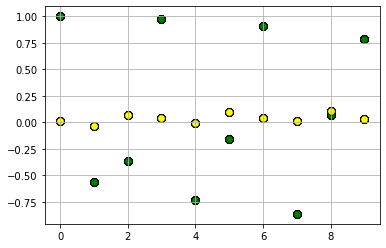

Epoch [15/100], Loss: 0.2544


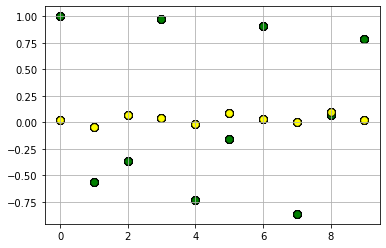

Epoch [20/100], Loss: 0.2505


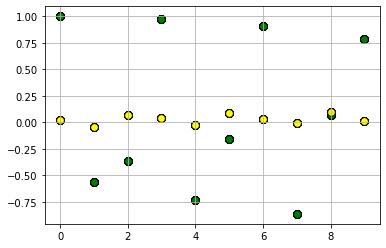

Epoch [25/100], Loss: 0.2476


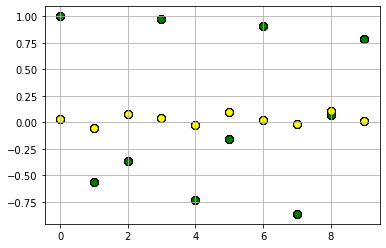

Epoch [30/100], Loss: 0.2452


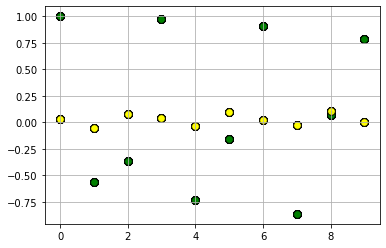

Epoch [35/100], Loss: 0.2432


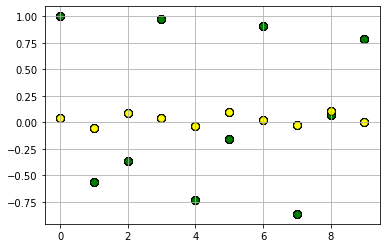

Epoch [40/100], Loss: 0.2412


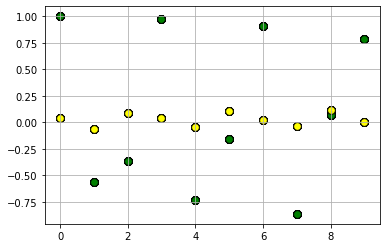

Epoch [45/100], Loss: 0.2392


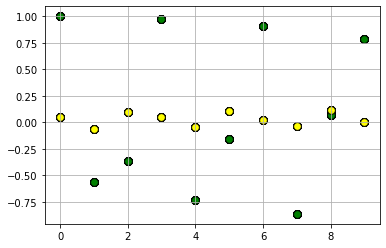

Epoch [50/100], Loss: 0.2370


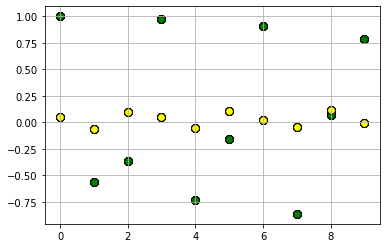

Epoch [55/100], Loss: 0.2348


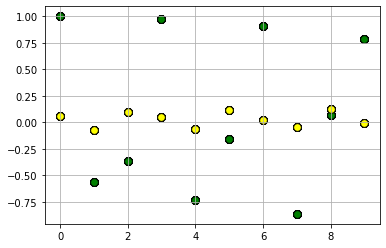

Epoch [60/100], Loss: 0.2325


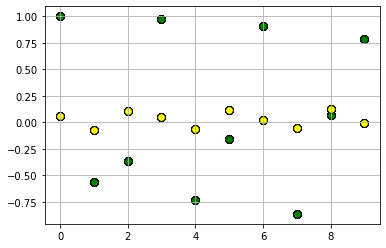

Epoch [65/100], Loss: 0.2301


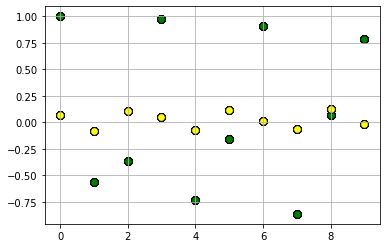

Epoch [70/100], Loss: 0.2277


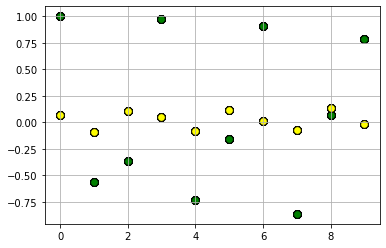

Epoch [75/100], Loss: 0.2252


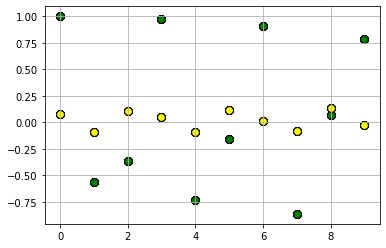

Epoch [80/100], Loss: 0.2225


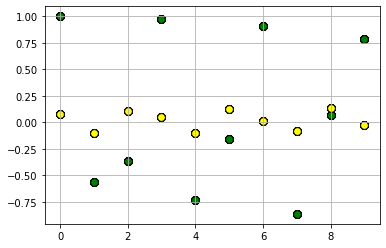

Epoch [85/100], Loss: 0.2198


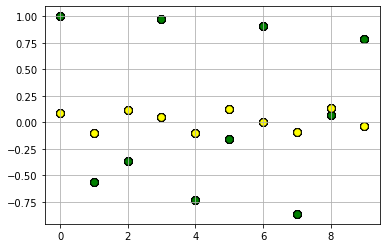

Epoch [90/100], Loss: 0.2169


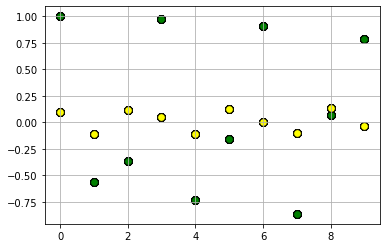

Epoch [95/100], Loss: 0.2139


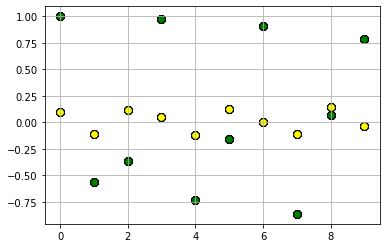

Epoch [100/100], Loss: 0.2107


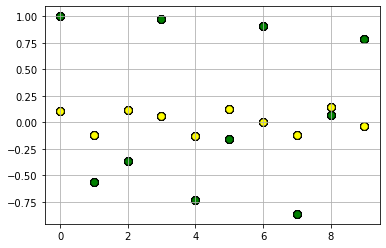

In [8]:
"""Βήμα 8"""
import numpy as np
import matplotlib.pyplot as plt
import os
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
def seq_Creator(f, seq, points):  
  
  T = 1/f

  omega = 2*np.pi*f

  starters = np.random.rand(seq)*(T)
  
  hmit = []
  sin1 = []
  pos = []
  for shmeio in range(0,seq):
    step = np.random.uniform(0.01,T/points)
    t = np.empty(points)
    for j in range(0,points):
      t[j] = j*step
    hmit.append(np.sin(omega*t))
    sin1.append(np.cos(omega*t))
    pos.append(t)
    
  return hmit, sin1, pos


sins, coss, posi = seq_Creator(40, 50, 10)

t = np.arange(10)
for i in range(0,10):
  plt.scatter(t, sins[15], c='green',s=60, alpha=0.9, edgecolors='k')
  plt.scatter(t, coss[15], c='yellow',s=60, alpha=0.9, edgecolors='k')
  
plt.grid()

plt.show ()

sins_aug = np.empty((50,10,2))
coss_aug = np.empty((50,10,2))

for i in range(0,50):
  for j in range(0,len(sins[i])):
    for z in range(0,2):
      if(z==0):
        sins_aug[i][j][z]=sins[i][j]
        coss_aug[i][j][z]=coss[i][j]
      elif(z==1):
        sins_aug[i][j][z]=posi[i][j]
        coss_aug[i][j][z]=posi[i][j]

import torch
from torch import nn
import torch.nn.functional as F

class basicRNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(basicRNN, self).__init__()

        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
       
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):
        
        batch_size = x.size(0)

      
        hidden = self.init_hidden(batch_size)

        
        out, hidden = self.rnn(x, hidden)
        
        
        out= out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out).view(-1, self.hidden_dim, 2).float()
        
        return out, hidden
    
    def init_hidden(self, batch_size):
        
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim).to(device)

        return hidden

X_sins = torch.FloatTensor(sins_aug)
y_coss = torch.FloatTensor(coss_aug)

RNN = basicRNN(input_size=2, output_size=2, hidden_dim=10, n_layers=1)

RNN.to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(RNN.parameters(), lr=0.001)


for epoch in range(1, 100 + 1):
    optimizer.zero_grad() 
    X_sins = X_sins.float()
    X_sins.to(device)
    output, hidden = RNN(X_sins)
    loss = criterion(output, y_coss)
    loss.backward()  
    optimizer.step() 
    
    if epoch%5 == 0:
      print ('Epoch [{}/{}],  Loss: {:.4f}' 
             .format(epoch, 100,  loss.item()))

      output1 = output.detach().numpy()
      output2 = output1[:,:,0]
      t = np.arange(10)
      for i in range(0,10):
        plt.scatter(t,coss[15], c='green',s=60, alpha=0.9, edgecolors='k')
        plt.scatter(t,output2[15], c='yellow',s=60, alpha=0.9, edgecolors='k')
  
      plt.grid()
      
      plt.show ()


      
class basicLSTM(nn.Module):
    def __init__(self, input_dim, output_dim, hdim, layers, drop):
        super(basicLSTM, self).__init__()

      
        self.hidden_dim = hdim
        self.layer_dim = layers
 
        self.lstm = nn.LSTM(
            input_dim, hdim, layers, batch_first=True, dropout=drop
        )

        
        self.fc = nn.Linear(hdim, output_dim)

    def forward(self, x):
 
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

       
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        
        
        out= out.contiguous().view(-1, self.hidden_dim)

      
        out = self.fc(out).view(-1, self.hidden_dim, 2).float()
           
        return out

LSTM = basicLSTM(2, 2, 10, 1,0.2)

LSTM.to(device)



criterion = nn.MSELoss()
optimizer = torch.optim.Adam(LSTM.parameters(), lr=0.001)


for epoch in range(1, 100 + 1):
    optimizer.zero_grad() 
    X_sins.float().to(device)
    output = LSTM(X_sins)
 
    loss = criterion(output, y_coss)
    loss.backward() 
    optimizer.step()
    
    if epoch%5 == 0:
      print ('Epoch [{}/{}], Loss: {:.4f}' 
             .format(epoch, 100, loss.item()))


      output1 = output.detach().numpy()
      output2 = output1[:,:,0]
      t = np.arange(10)
      for i in range(0,10):
        plt.scatter(t,coss[14], c='green',s=60, alpha=0.9, edgecolors='k')
        plt.scatter(t,output2[14], c='yellow',s=60, alpha=0.9, edgecolors='k')
  
      plt.grid()

      plt.show ()

class basicGRU(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim, layer_dim, dropout_prob):
        super(basicGRU, self).__init__()
        self.layer_dim = layer_dim
       
        self.hidden_dim = hidden_dim

        self.gru = nn.GRU(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
       
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

       
        out, _ = self.gru(x, h0.detach())

    
        out= out.contiguous().view(-1, self.hidden_dim)

     
        out = self.fc(out).view(-1, self.hidden_dim, 2).float()
        
        return out

GRU = basicGRU(input_dim=2, output_dim=2, hidden_dim=10, layer_dim=1,dropout_prob=0.2)

GRU.to(device)



criterion = nn.MSELoss()
optimizer = torch.optim.Adam(GRU.parameters(), lr=0.001)

for epoch in range(1, 100 + 1):
    optimizer.zero_grad()
    X_sins.float().to(device)
    output = GRU(X_sins)

    loss = criterion(output, y_coss)
    loss.backward() 
    optimizer.step() 
    
    if epoch%5== 0:
      print ('Epoch [{}/{}], Loss: {:.4f}' 
             .format(epoch,100, loss.item()))

      output1 = output.detach().numpy()
      output2 = output1[:,:,0]
      t = np.arange(10)
      for i in range(0,10):
        plt.scatter(t,coss[0], c='green',s=60, alpha=0.9, edgecolors='k')
        plt.scatter(t,output2[0], c='yellow',s=60, alpha=0.9, edgecolors='k')
  
      plt.grid()
      plt.show ()